In [1]:
import pandas as pd
import numpy as np
import os


languages = ['en', 'fr', 'nl', 'es', 'ru', 'jp', 'zh', 'ko', 'vi', 'el', 'bn', 'ceb', 'hu', 'he', 'tr', 'mr', 'war', 'tl', 'sw', 'pa', 'mg', 'yo', 'ilo']
models = ['mbert_base', 'xlm_base', 'xlmr_base']
parts = ['trans', 'all', 'non']
decoding_types = ['default', 'confidence']

base_path = '../X-FACTR/experiments'

# experiments that still have to be run
missing_experiments = []

baseline_results = []


for part in parts:
    for decoding_type in decoding_types:
        for lang in languages:
            for model in models:
                path = f'{base_path}/{part}/{decoding_type}/{model}/{lang}.csv'
                
                if os.path.exists(path):
                    df = pd.read_csv(path)
                    try:
                    
                        acc = df['acc']
                    # for some reason some languages saved without columns
                    except KeyError:
                        df.columns = ['relation', 'acc', 'acc_ori', 'len_acc', 'len_acc_ori', 'prompt'] 
                        acc = df['acc']    
                    baseline_results.append({'language': lang, 'model':model, 'decoding_type':decoding_type, 'part':part, 'acc':np.mean(df['acc']), 'len_acc':np.mean(df['len_acc'])})
                else:                        
                    missing_experiments.append({'language':lang, 'model':model, 'part':part, 'decoding_type':decoding_type})
                

missing_df = pd.DataFrame.from_dict(missing_experiments)
baseline_results_df = pd.DataFrame.from_dict(baseline_results)                


In [2]:
missing_df

,language,model,part,decoding_type
0,en,xlmr_base,trans,default
1,fr,xlmr_base,trans,default
2,nl,xlmr_base,trans,default
3,es,xlmr_base,trans,default
4,ru,mbert_base,trans,default
...,...,...,...,...
337,yo,xlm_base,non,confidence
338,yo,xlmr_base,non,confidence
339,ilo,mbert_base,non,confidence
340,ilo,xlm_base,non,confidence


In [3]:
baseline_results_df

,language,model,decoding_type,part,acc,len_acc
0,en,mbert_base,default,trans,0.083970,0.274543
1,en,xlm_base,default,trans,0.047401,0.208959
2,fr,mbert_base,default,trans,0.057823,0.258838
3,fr,xlm_base,default,trans,0.039179,0.212139
4,nl,mbert_base,default,trans,0.093158,0.288124
...,...,...,...,...,...,...
67,mg,xlm_base,confidence,trans,0.000000,0.092606
68,yo,mbert_base,confidence,trans,0.001692,0.109873
69,yo,xlm_base,confidence,trans,0.000519,0.107065
70,ilo,mbert_base,confidence,trans,0.001720,0.141752


In [4]:
baseline_results_df_mbert_base = baseline_results_df[baseline_results_df['model'] == 'mbert_base']
baseline_results_df_xlm_base = baseline_results_df[baseline_results_df['model'] == 'xlm_base']


In [5]:
baseline_results_df_mbert_base

,language,model,decoding_type,part,acc,len_acc
0,en,mbert_base,default,trans,0.083970,0.274543
2,fr,mbert_base,default,trans,0.057823,0.258838
4,nl,mbert_base,default,trans,0.093158,0.288124
6,es,mbert_base,default,trans,0.092837,0.251733
8,zh,mbert_base,default,trans,0.038613,0.226444
10,ko,mbert_base,default,trans,0.020393,0.155212
12,vi,mbert_base,default,trans,0.059900,0.273692
14,ceb,mbert_base,default,trans,0.038828,0.201035
16,hu,mbert_base,default,trans,0.011719,0.265311
18,he,mbert_base,default,trans,0.017481,0.153165


/home/andre/miniconda3/envs/xfactr/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


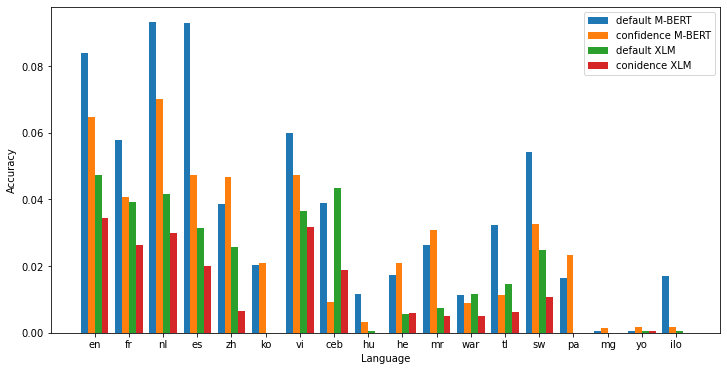

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


mbert_default_df = baseline_results_df_mbert_base[baseline_results_df_mbert_base['decoding_type'] == 'default']
mbert_default_df.language = mbert_default_df.language.astype('category') 
mbert_default_df.language = mbert_default_df.language.cat.set_categories(languages)
#mbert_default_df = mbert_default_df.rename(columns={'acc':'default M-BERT'})

mbert_confidence_df = baseline_results_df_mbert_base[baseline_results_df_mbert_base['decoding_type'] == 'confidence']
mbert_confidence_df.language = mbert_confidence_df.language.astype('category') 
mbert_confidence_df.language = mbert_confidence_df.language.cat.set_categories(languages)
#mbert_confidence_df = mbert_confidence_df.rename(columns = {'acc':'confidence M-BERT'})

xlm_base_default_df = baseline_results_df_xlm_base[baseline_results_df_xlm_base['decoding_type'] == 'default']
xlm_base_default_df.language = xlm_base_default_df.language.astype('category') 
xlm_base_default_df.language = xlm_base_default_df.language.cat.set_categories(languages)
#xlm_base_default_df =xlm_base_default_df.rename(columns= {'acc':'default XLM'})

xlm_base_confidence_df = baseline_results_df_xlm_base[baseline_results_df_xlm_base['decoding_type'] == 'confidence']
xlm_base_confidence_df.language = xlm_base_confidence_df.language.astype('category') 
xlm_base_confidence_df.language = xlm_base_confidence_df.language.cat.set_categories(languages)
#xlm_base_confidence_df = xlm_base_confidence_df.rename(columns= {'acc':'confidence XLM'})


x = np.arange(len(mbert_default_df['language']))
width = 0.2

plt.figure(figsize=(12,6))
plt.bar(x-0.3, mbert_default_df['acc'], width, label='default M-BERT')
plt.bar(x-0.1, mbert_confidence_df['acc'], width, label='confidence M-BERT')
plt.bar(x+0.1, xlm_base_default_df['acc'], width, label='default XLM')
plt.bar(x+0.3, xlm_base_confidence_df['acc'], width, label='conidence XLM')
plt.xticks(x, mbert_default_df['language'])
plt.xlabel('Language')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#full_df = mbert_default_df.merge(mbert_confidence_df, left_on='language', right_on='language')
#full_df = full_df.merge(xlm_base_default_df, left_on='language', right_on='language')
#full_df = full_df.merge(xlm_base_confidence_df, left_on='language', right_on='language')
#
#full_df = full_df[['language', 'default M-BERT', 'confidence M-BERT', 'default XLM', 'confidence XLM']]
#full_df

#df = pd.DataFrame({'default - M-BERT': mbert_default_df[['language', 'acc']], 'confidence - M-BERT':mbert_confidence_df[['language', 'acc']],
#                   'default - XLM': xlm_base_default_df[['language', 'acc']], 'confidence - XLM': xlm_base_confidence_df[['language', 'acc']]}, index=mbert_default_df['language'])
#df


In [15]:
print(missing_df[missing_df['model'].isin(['mbert_base', 'xlm_base'])].to_markdown())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().